In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# **Features Description**
 **PassengerId**: A unique identifier assigned to each passenger.

**Survived**: Indicates whether a passenger survived (1) or died (0).

**Pclass**: Represents the passenger class, which can be a numerical or categorical value indicating the class of travel (e.g., first, second, or third class).

**Name**: The name of the passenger.

**Sex**: Represents the gender of the passenger, typically categorized as male or female.

**Age**: The age of the passenger, often represented as a numerical value.

**SibSp**: Indicates the number of siblings or spouses traveling with the passenger.

**Parch**: Represents the number of parents or children traveling with the passenger.

**Ticket**: The ticket number associated with the passenger's ticket.

**Fare**: The amount of money spent on the ticket.

**Cabin**: Represents the cabin category or number assigned to the passenger, if available.

**Embarked**: Indicates the port where the passenger embarked from, typically represented by a single character code (e.g., C for Cherbourg, Q for Queenstown, S for Southampton)

# **EDA**

In [2]:
data=pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.shape

(891, 12)

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.duplicated().sum()

0

# **Visualization**

In [10]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [11]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

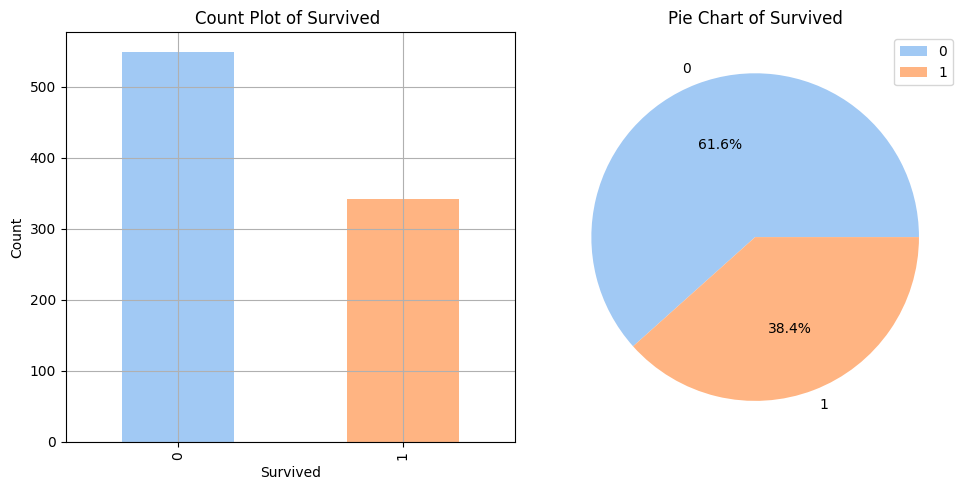

In [12]:
# Get the value counts of the 'Survived' column
sex_counts = data['Survived'].value_counts()

# Set up colors for each category using a pastel palette
colors = sns.color_palette("pastel")

# Plot count plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sex_counts.plot(kind='bar', color=colors)
plt.title('Count Plot of Survived ')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.grid()

# Plot pie chart
plt.subplot(1, 2, 2)
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Pie Chart of Survived')

# Adjust layout
plt.tight_layout()
plt.legend()

# Show plots
plt.show()


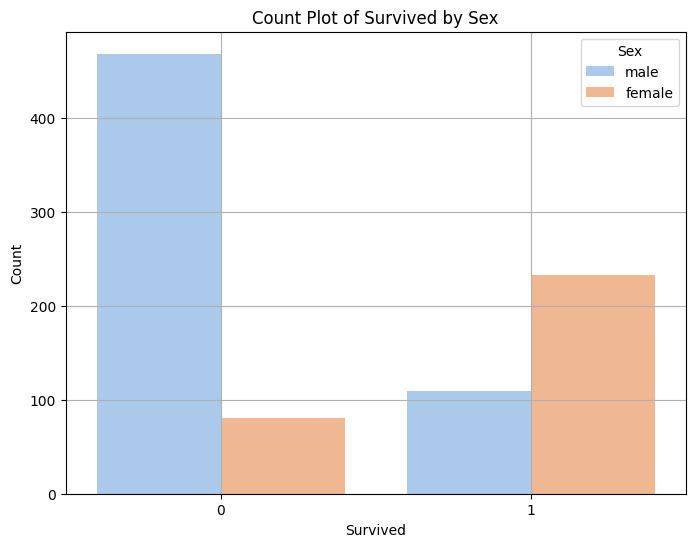

In [13]:
# Set the seaborn style to use pastel colors
sns.set_palette("pastel")

# Plot the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Count Plot of Survived by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.grid()
plt.legend(title='Sex')

# Show the plot
plt.show()

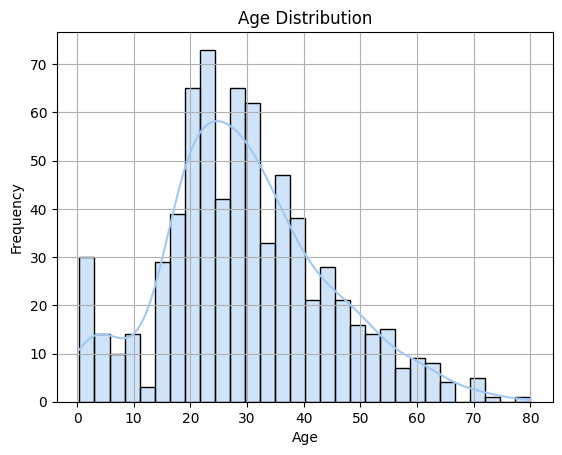

In [14]:
# Set the seaborn style to use pastel colors
sns.set_palette("pastel")
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

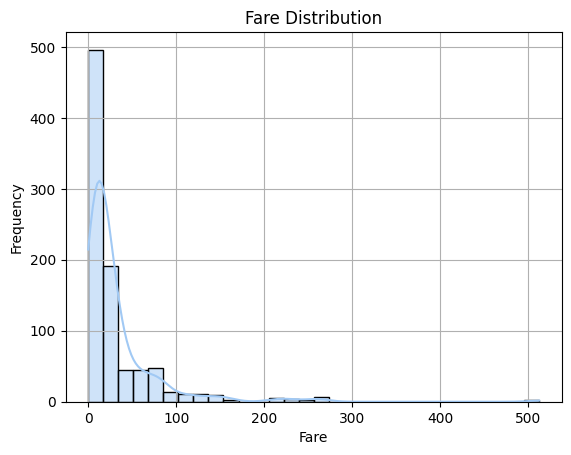

In [15]:
# Set the seaborn style to use pastel colors
sns.set_palette("pastel")
sns.histplot(data=data, x='Fare', bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid()
plt.show()

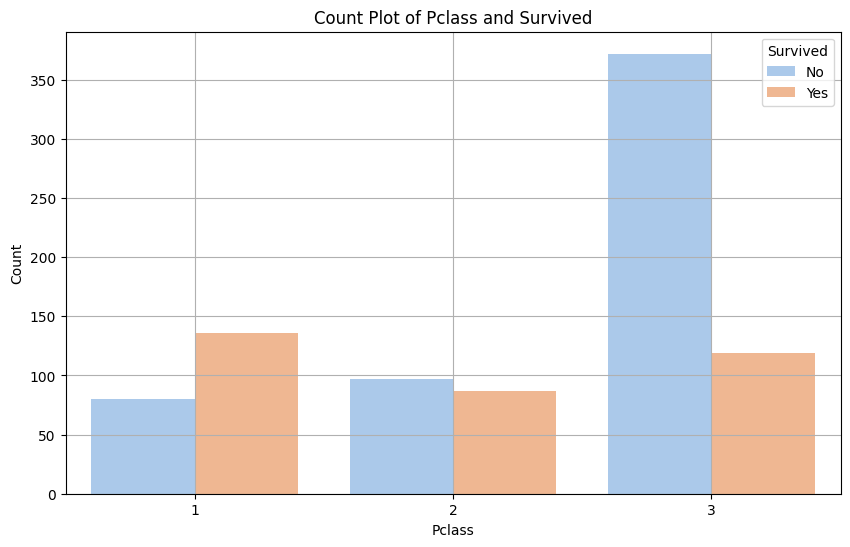

In [16]:

# Set the seaborn style to use pastel colors
sns.set_palette("pastel")

# Plot the count plot with both 'Pclass' and 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Count Plot of Pclass and Survived')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])  # Legend for Survived
plt.grid(True)

# Show the plot
plt.show()


In [17]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

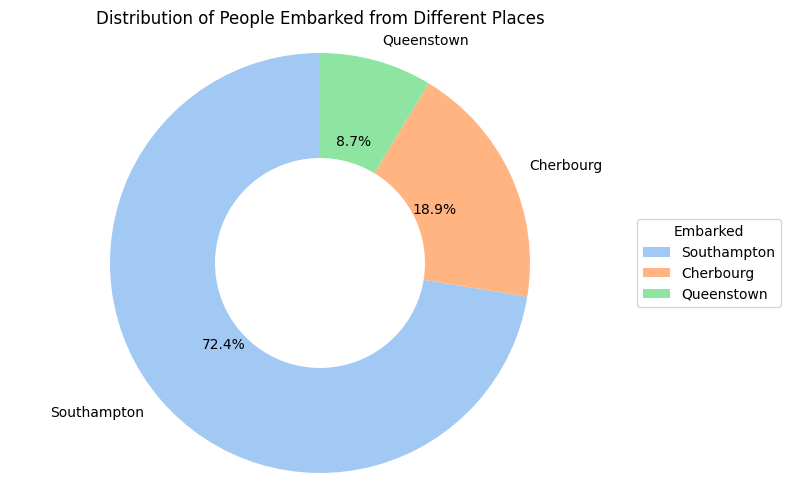

In [18]:
# Calculate the value counts for 'Embarked'
embarked_counts = data['Embarked'].value_counts()

# Define labels and sizes for the pie chart
labels = ['Southampton', 'Cherbourg', 'Queenstown']
sizes = embarked_counts.values.tolist()

# Define colors using a seaborn pastel color palette
colors = sns.color_palette('pastel')

# Create the pie chart with a smaller size
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.5))

# Set equal aspect ratio
ax.axis('equal')

# Add a circle in the middle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
ax.add_artist(centre_circle)

# Add a legend
ax.legend(wedges, labels, title='Embarked', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Set title
plt.title('Distribution of People Embarked from Different Places')

# Show the plot
plt.show()


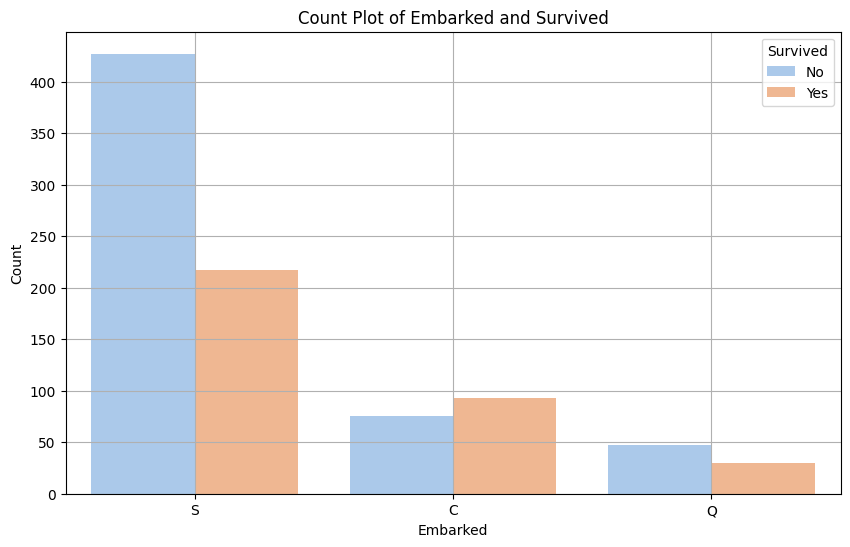

In [19]:
# Set the seaborn style to use pastel colors
sns.set_palette("pastel")

# Plot the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Count Plot of Embarked and Survived')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])  # Legend for Survived
plt.grid(True)

# Show the plot
plt.show()

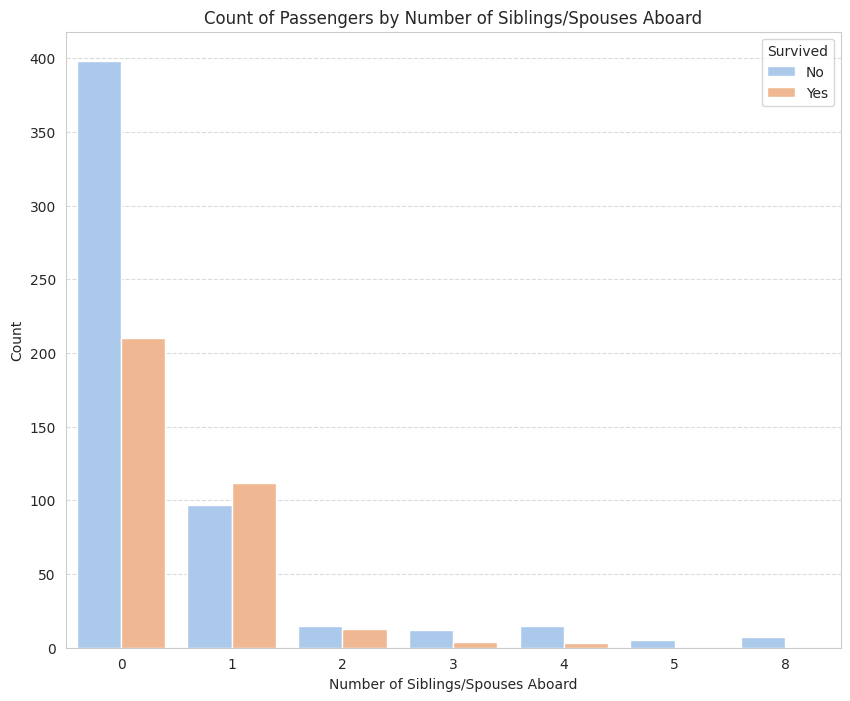

In [20]:
# Set style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(10, 8))
sns.countplot(data=data, x="SibSp", hue="Survived", palette="pastel")
plt.title('Count of Passengers by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


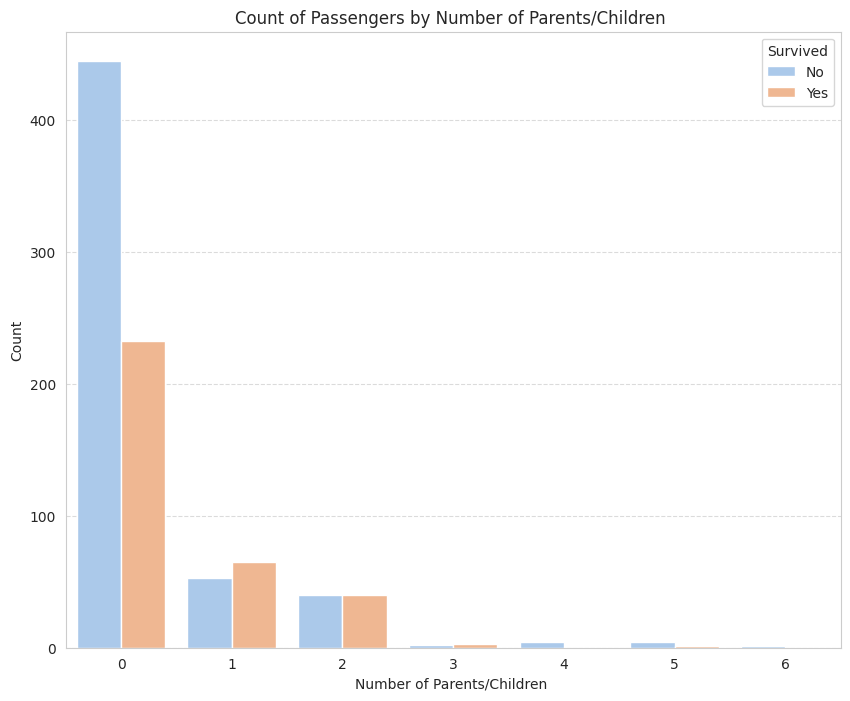

In [21]:
# Set style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(10, 8))
sns.countplot(data=data, x="Parch", hue="Survived", palette="pastel")
plt.title('Count of Passengers by Number of Parents/Children ')
plt.xlabel('Number of Parents/Children ')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Data Preprocessing**

In [22]:
# Fill missing values in 'Age' with mean
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Fill missing values in 'Embarked' with the most frequent value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [23]:
# Remove the "Cabin" column
data = data.drop(columns=['Cabin','Ticket','Name','PassengerId'], axis=1)

In [24]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Sex' column
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Encode 'Embarked' column
data['Embarked'] = label_encoder.fit_transform(data['Embarked'].astype(str))


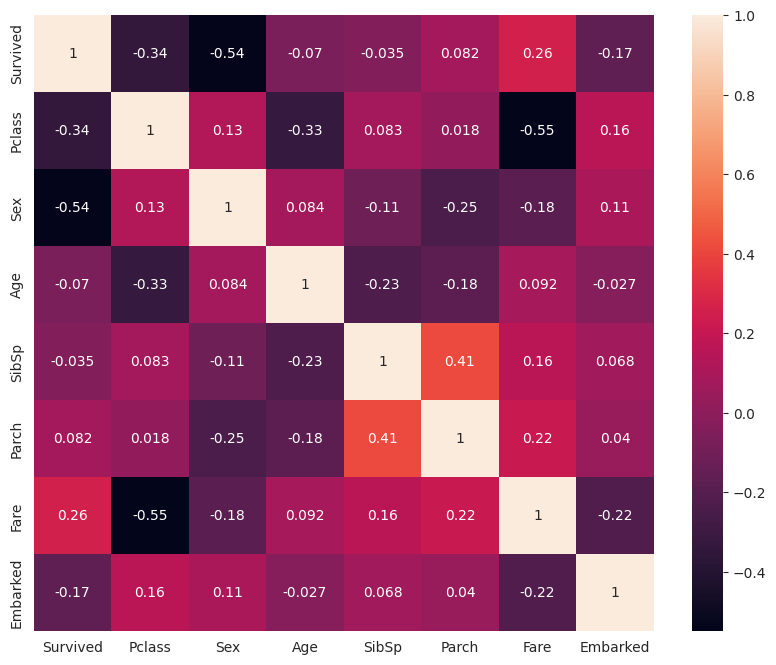

In [36]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [25]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [27]:
X=data.drop(columns=['Survived'])
y=data['Survived']


In [28]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

<ipython-input-34-e83c45955b46>:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=y_resampled, hue=y_resampled, palette=pastel_palette, legend=False)


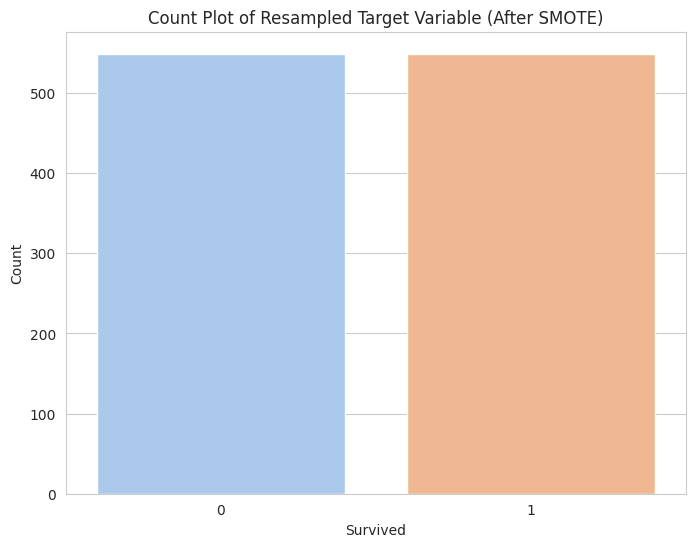

In [34]:
# Define a pastel color palette
pastel_palette = sns.color_palette("pastel")

# Plot the count plot for the resampled target variable with pastel colors
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, hue=y_resampled, palette=pastel_palette, legend=False)
plt.title('Count Plot of Resampled Target Variable (After SMOTE)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


In [48]:
from sklearn.preprocessing import StandardScaler
# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [52]:
from sklearn.model_selection import train_test_split

# Split the data into training set (60%) and a temporary set (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_resampled, test_size=0.4, random_state=42)

# Split the temporary set into validation set (50% of temp set -> 20% of original data) and test set (50% of temp set -> 20% of original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now you have X_train, X_val, X_test, y_train, y_val, and y_test for training, validation, and testing your model


# **Build Models**

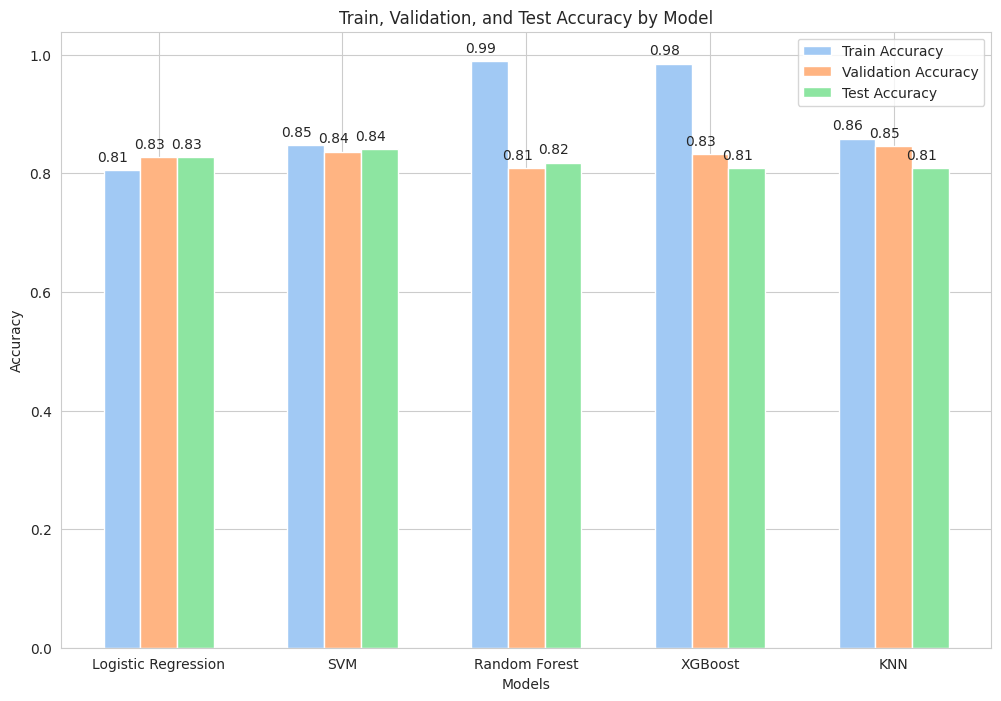

In [57]:

# Split the data into training set (60%) and a temporary set (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_resampled, test_size=0.4, random_state=42)

# Split the temporary set into validation set (50% of temp set -> 20% of original data) and test set (50% of temp set -> 20% of original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Train, validate, and test each classifier
results = {}
for name, clf in classifiers.items():
    # Train classifier
    clf.fit(X_train, y_train)

    # Predict on train, validation, and test data
    train_preds = clf.predict(X_train)
    val_preds = clf.predict(X_val)
    test_preds = clf.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, train_preds)
    val_accuracy = accuracy_score(y_val, val_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    # Store results
    results[name] = {
        'Train Accuracy': train_accuracy,
        'Validation Accuracy': val_accuracy,
        'Test Accuracy': test_accuracy
    }

# Extract model names and accuracies
model_names = list(results.keys())
train_accuracies = [metrics['Train Accuracy'] for metrics in results.values()]
val_accuracies = [metrics['Validation Accuracy'] for metrics in results.values()]
test_accuracies = [metrics['Test Accuracy'] for metrics in results.values()]

# Define the width of the bars
bar_width = 0.2

# Define the position of the bars
index = np.arange(len(model_names))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add bars for train, validation, and test accuracies
bar1 = ax.bar(index, train_accuracies, bar_width, label='Train Accuracy', color=sns.color_palette("pastel")[0])
bar2 = ax.bar(index + bar_width, val_accuracies, bar_width, label='Validation Accuracy', color=sns.color_palette("pastel")[1])
bar3 = ax.bar(index + 2 * bar_width, test_accuracies, bar_width, label='Test Accuracy', color=sns.color_palette("pastel")[2])

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Train, Validation, and Test Accuracy by Model')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names)
ax.legend()

# Annotate bars with accuracy values
for i in range(len(model_names)):
    ax.text(i - bar_width/2 + 0.05, train_accuracies[i] + 0.01, f"{train_accuracies[i]:.2f}", ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width/2 + 0.05, val_accuracies[i] + 0.01, f"{val_accuracies[i]:.2f}", ha='center', va='bottom', fontsize=10)
    ax.text(i + 1.5 * bar_width + 0.05, test_accuracies[i] + 0.01, f"{test_accuracies[i]:.2f}", ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()


# **confusion matrix for KNN (Best model)**

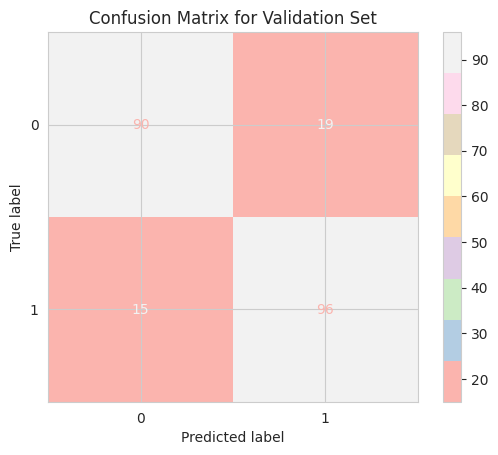

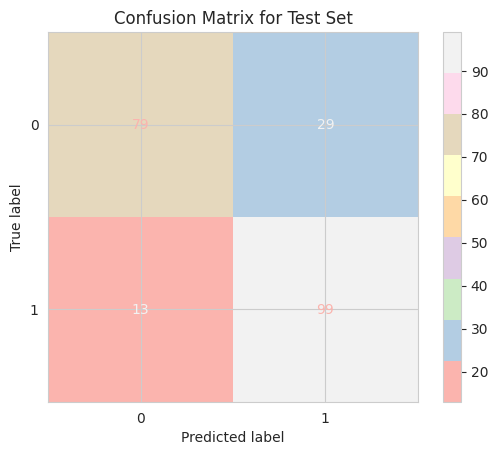

In [72]:

# Define the function to plot confusion matrix
def plot_confusion_matrix(model, X_val, y_val, X_test, y_test):
    # Generate and display confusion matrix for the model
    if model:
        val_preds = model.predict(X_val)
        cm_val = confusion_matrix(y_val, val_preds)
        disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=model.classes_)
        disp_val.plot(cmap='Pastel1')
        plt.title('Confusion Matrix for Validation Set')
        plt.show()

        test_preds = model.predict(X_test)
        cm_test = confusion_matrix(y_test, test_preds)
        disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
        disp_test.plot(cmap='Pastel1')
        plt.title('Confusion Matrix for Test Set')
        plt.show()

# Identify the KNN model
knn_model = None
for name, clf in classifiers.items():
    if name == 'KNN':
        knn_model = clf
        break

# Plot the confusion matrix for the KNN model
if knn_model:
    plot_confusion_matrix(knn_model, X_val, y_val, X_test, y_test)


# **Voting** **classifier**

In [64]:
estimator = []
estimator.append(('LR', LogisticRegression()))
estimator.append(('SVC', SVC(gamma ='auto', C=5)))
estimator.append(('KNN', KNeighborsClassifier()))

vot = VotingClassifier(estimators=estimator, voting='hard')
vot.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('SVC', SVC(C=5, gamma='auto')),
                             ('KNN', KNeighborsClassifier())])

In [67]:
VCtrain_acc=vot.score(X_train, y_train)
VCval_acc=vot.score(X_val, y_val)
VCtet_acc=vot.score(X_test, y_test)
print("train accuracy: ",VCtrain_acc)
print("validation accuracy: ",VCval_acc)
print("test accuracy: ",VCtet_acc)

train accuracy:  0.8525835866261399
validation accuracy:  0.8409090909090909
test accuracy:  0.8136363636363636


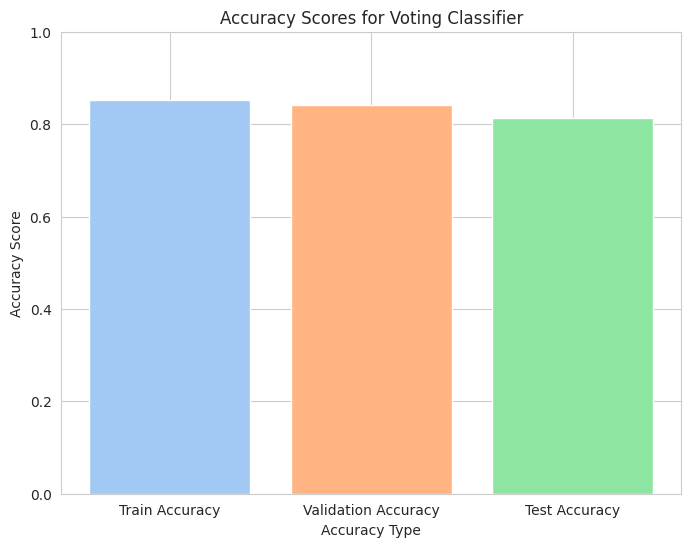

In [75]:
# Define a pastel color palette
pastel_palette = sns.color_palette("pastel")

# Define the accuracies
accuracies = {'Train Accuracy': VCtrain_acc,
              'Validation Accuracy': VCval_acc,
              'Test Accuracy': VCtet_acc}

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=pastel_palette)
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Voting Classifier')
plt.ylim(0, 1)  # Set the y-axis limit to range from 0 to 1
plt.show()


# **Confusion Matrix for Voting Classifier Model**

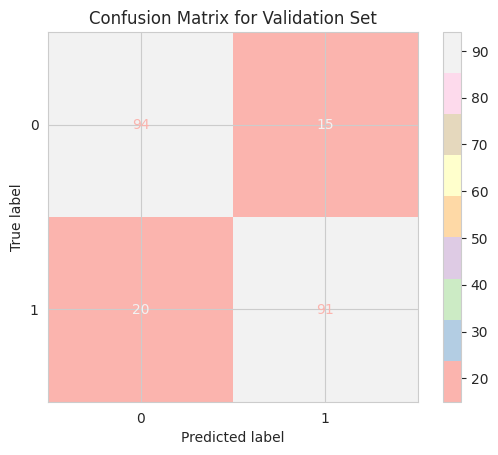

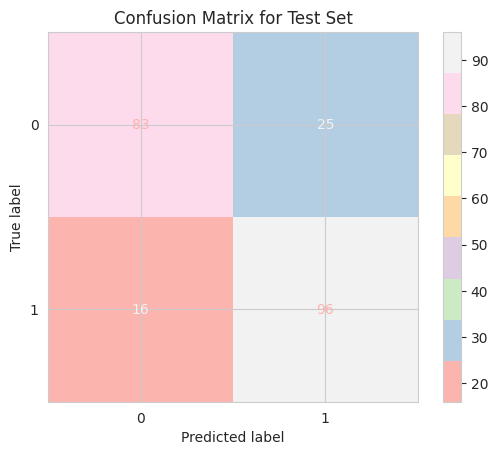

In [73]:
plot_confusion_matrix(vot, X_val, y_val, X_test, y_test)